In [1]:
#Importing required libraries :

import datetime
import time
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Data Modeling
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import keras
from keras.layers import Dense
from keras.models import load_model
# Data Metrics
from sklearn import metrics
import joblib

In [2]:
#Importing the trainig data from train.csv :
path="/content/train.csv"
train_data = pd.read_csv(path)

In [3]:
#Viewing 1st 5 rows of the Dataset :
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
#Checking the shape of the Dataset :
train_data.shape

(14999, 9)

In [5]:
# Statistical description of data
train_data.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [6]:
# Check missing values and dtype
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [7]:
# Checking null values
train_data.isnull().sum()

,0
vidid,0
adview,0
views,0
likes,0
dislikes,0
comment,0
published,0
duration,0
category,0


In [8]:
#Removing videos with adview greater than 2000000 as outliers :
train_data = train_data[train_data['adview'] < 2000000]
train_data.shape

(14998, 9)

In [9]:
#Assigning each category to a number for 'category' feature :
category = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'H' : 8}
train_data['category'] = train_data['category'].map(category)

train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [10]:
#Removing the character 'F' present in the data :
train_data = train_data[train_data.views != 'F']
train_data = train_data[train_data.likes != 'F']
train_data = train_data[train_data.dislikes != 'F']
train_data = train_data[train_data.comment != 'F']
train_data.shape

(14636, 9)

In [11]:
#Converting values to integers for views, likes, comments, dislkes and adview :
train_data['views'] = pd.to_numeric(train_data['views'])
train_data['likes'] = pd.to_numeric(train_data['likes'])
train_data['dislikes'] = pd.to_numeric(train_data['dislikes'])
train_data['comment'] = pd.to_numeric(train_data['comment'])
train_data['adview'] = pd.to_numeric(train_data['adview'])

#Extracting the 'vidid' column from train_data and storing in vidid_column :
vidid_column = train_data['vidid']
vidid_column

,vidid
0,VID_18655
1,VID_14135
2,VID_2187
3,VID_23096
4,VID_10175
5,VID_10756
6,VID_9782
7,VID_16452
8,VID_18486
9,VID_681


In [12]:
#Encoding features like 'published', 'duration' and 'vidid' :
train_data['duration'] = LabelEncoder().fit_transform(train_data['duration'])
train_data['published'] = LabelEncoder().fit_transform(train_data['published'])
train_data['vidid'] = LabelEncoder().fit_transform(train_data['vidid'])
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [13]:
#Defining a function to convert time to seconds under 'duration' column :

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H', 'M', 'S']
  for i in y:
    if i not in P:
      mm += i
    else:
      if i == 'H':
        h = mm
        mm = ''
      elif i == 'M':
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''

  if h == '':
    h = '00'
  if m == '':
    m = '00'
  if s == '':
    s = '00'
  bp = h + ':' + m + ':' + s
  return bp


train = pd.read_csv('train.csv')
mp = pd.read_csv(path)['duration']
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return (int)(h) * 3600 + (int)(m) * 60 + (int)(s)

time1 = time.apply(func_sec)

train_data['duration'] = time1
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


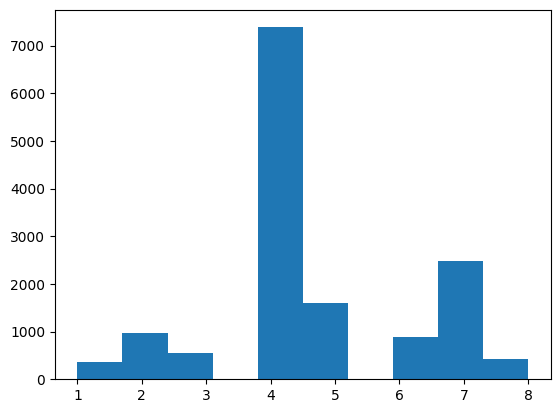

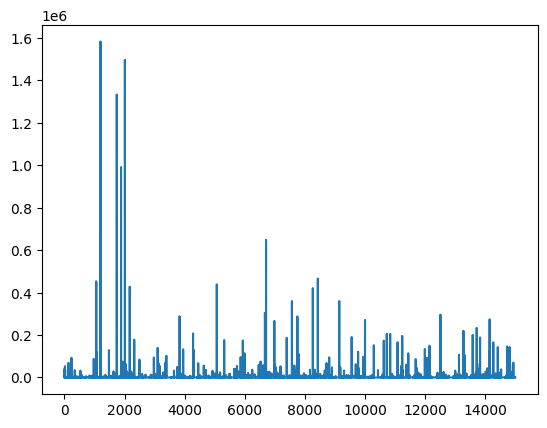

In [14]:
#Visualization of Individual Plots :
plt.hist(train_data['category'])
plt.show()
plt.plot(train_data['adview'])
plt.show()

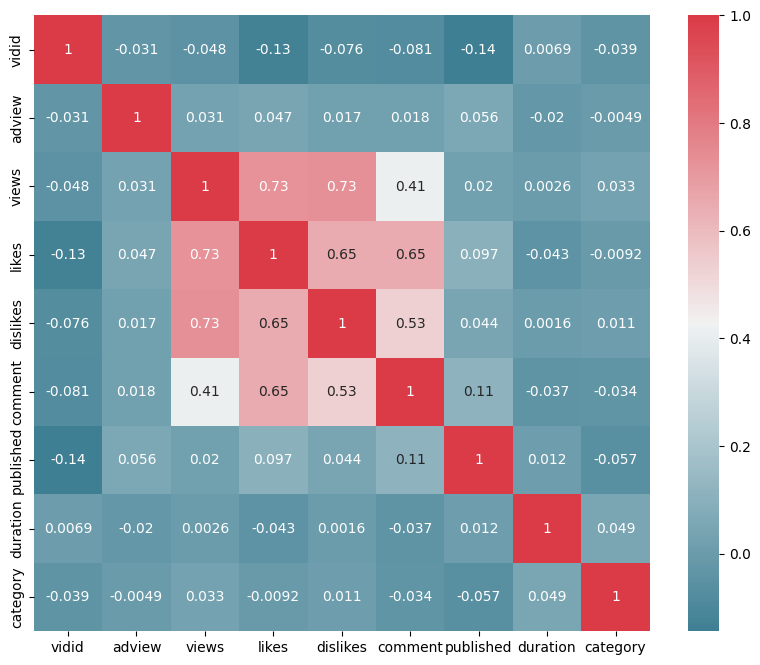

In [16]:
#Visualizing in HeatMap:

f, ax = plt.subplots(figsize = (10,8))
corr = train_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

In [17]:
#Splitting Data :
Y_train = pd.DataFrame(data = train_data.iloc[:,1].values, columns = ['target'])
train_data = train_data.drop(['adview'], axis = 1)
train_data = train_data.drop(['vidid'], axis = 1)
train_data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data, Y_train, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11708, 7)
(2928, 7)
(11708, 1)
(2928, 1)


In [19]:
#Normalising Data :
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train.mean())
print(X_test.mean())

0.1739096800320488
0.17614792076344343


In [20]:
#Evaluation Metrics :
def print_error(X_test, Y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, prediction))
  print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, prediction))
  print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

In [21]:
#Linear Regressor :
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
print_error(X_test, Y_test, linear_regression)

Mean Absolute Error :  3707.3780058245316
Mean Squared Error :  835663131.1210335
Root Mean Squared Error :  28907.83857573986


In [22]:
#Support Vector Regressor(SVR) :
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, Y_train)
print_error(X_test, Y_test, supportvector_regressor)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error :  1696.9438599505638
Mean Squared Error :  833685776.029172
Root Mean Squared Error :  28873.617300732723


In [23]:
#Decision Tree Regressor :
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
print_error(X_test, Y_test, decision_tree)

Mean Absolute Error :  2602.2373633879783
Mean Squared Error :  878344830.2967896
Root Mean Squared Error :  29636.882938271185


In [24]:
#Random Forest Regressor :
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
random_forest.fit(X_train, Y_train)
print_error(X_test, Y_test, random_forest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error :  3440.447907674141
Mean Squared Error :  722312114.4343233
Root Mean Squared Error :  26875.864905790906


In [25]:
#Creating Artificial Neural Network :
ann = keras.models.Sequential([Dense(6, activation = 'relu', input_shape = X_train.shape[1:]), Dense(6, activation = 'relu'), Dense(1)])
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer = optimizer, loss = loss, metrics = ['mean_squared_error'])
history = ann.fit(X_train, Y_train, epochs = 100)
ann.summary()
print_error(X_test, Y_test, ann)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 498381312.0000 - mean_squared_error: 498381312.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1275439872.0000 - mean_squared_error: 1275439872.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 561222400.0000 - mean_squared_error: 561222400.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 618436160.0000 - mean_squared_error: 618436160.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 665932928.0000 - mean_squared_error: 665932928.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 663639488.0000 - mean_squared_error: 663639488.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 608612096.0000 - mean_squared_error: 608612096.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 978452736.0000 - mean_squared_error: 978452736.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 785486656.0000 - mean_squared_err

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error :  3303.296479111812
Mean Squared Error :  829705268.7544347
Root Mean Squared Error :  28804.604992161145


In [26]:
#Saving Scikitlearn models :
joblib.dump(supportvector_regressor, 'SVR_youtubeadview.pkl')
#Saving Keras Artificial Neural Network Model :
ann.save('ann_youtubeadview.h5')

In [27]:
test_path = '/content/test.csv'
test_data = pd.read_csv(test_path)

In [28]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [29]:
test_data.shape

(8764, 8)

In [30]:
#Removing character 'F' present in the data :
test_data = test_data[test_data.views != 'F']
test_data = test_data[test_data.likes != 'F']
test_data = test_data[test_data.dislikes != 'F']
test_data = test_data[test_data.comment != 'F']

test_data.shape

(8549, 8)

In [31]:
#Assigning each category to a number for 'category' feature :
category = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'H' : 8}
test_data['category'] = test_data['category'].map(category)

test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [32]:
#Converting values to integers for views, likes, comments, dislkes and adview :
test_data['views'] = pd.to_numeric(test_data['views'])
test_data['likes'] = pd.to_numeric(test_data['likes'])
test_data['dislikes'] = pd.to_numeric(test_data['dislikes'])
test_data['comment'] = pd.to_numeric(test_data['comment'])

#Extracting the 'vidid' column from test_data and storing in vidid_column :
vidid_column = test_data['vidid']
vidid_column

,vidid
0,VID_1054
1,VID_18629
2,VID_13967
3,VID_19442
4,VID_770
5,VID_10315
6,VID_7417
7,VID_17788
8,VID_14591
9,VID_1228


In [33]:
#Encoding features like 'duration', 'vidid' and 'published' :
test_data['duration'] = LabelEncoder().fit_transform(test_data['duration'])
test_data['vidid'] = LabelEncoder().fit_transform(test_data['vidid'])
test_data['published'] = LabelEncoder().fit_transform(test_data['published'])

test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [34]:
#Converting time to seconds under 'duration' column :

test = pd.read_csv('test.csv')
mp = pd.read_csv(test_path)['duration']
time = mp.apply(checki)

time1 = time.apply(func_sec)

test_data['duration'] = time1
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [35]:
test_data = test_data.drop(['vidid'], axis = 1)
test_data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [36]:
#Normalising Data :
scaler = MinMaxScaler()
X_test = test_data
X_test = scaler.fit_transform(X_test)

In [37]:
#Model selection : Support Vector Regressor Model since this model gave the least Mean Absolute Error
model = supportvector_regressor

In [38]:
#Performing Prediction on test data :
prediction = model.predict(X_test)

In [39]:
#Converting the prediction into a Dataframe :
prediction = pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


In [40]:
#Renaming the column to 'adview' :
prediction = prediction.rename(columns = {0 : 'adview'})
prediction.head()

,adview
0,2.655214
1,2.402158
2,2.059470
3,2.284217
4,2.284820


In [42]:
#Saving the prediction Dataframe in a new .csv FIle -> 'prediction.csv' :
prediction.to_csv('PredictedAdview.csv')